# Predicting Strokes

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

In [15]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## What BMI group have the highest risk of getting a stroke?

I will create a new column called "BMI_category" based on the standard BMI categories. Then i will check the risk of having a stroke (this can easly be done by checking the .mean() in the stroke column for each group). I will then plot it to make it visably clear.

C:\Users\benja\AppData\Local\Temp\ipykernel_11604\3774694585.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stroke_risk_by_bmi, x='BMI_Category', y='Stroke_Risk', palette='coolwarm')


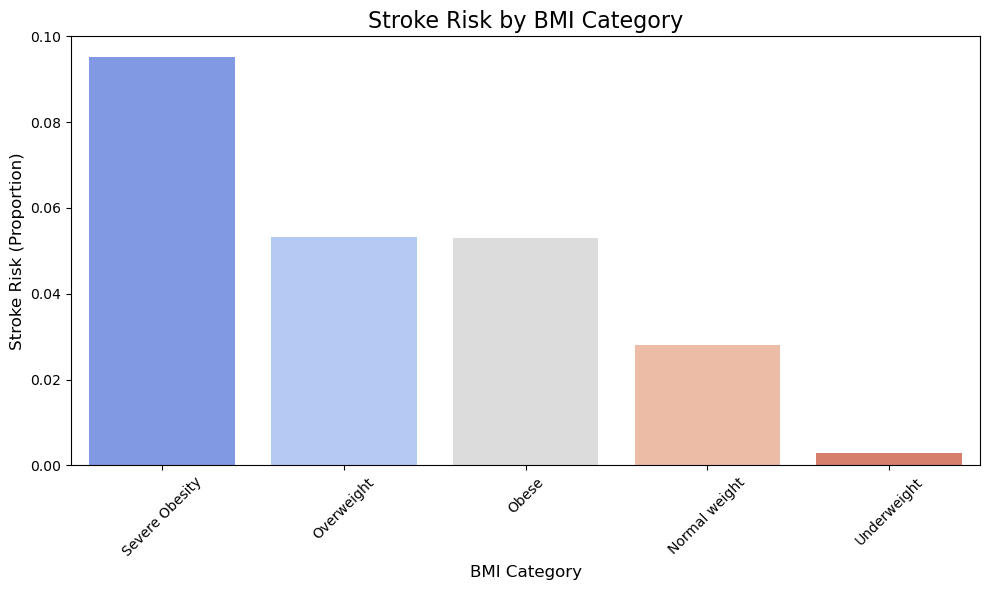

In [28]:
# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi <= 40:
        return 'Obese'
    else:
        return 'Severe Obesity'

# Add new column
df['BMI_Category'] = df['bmi'].apply(bmi_category)


# Calculate stroke risk for each BMI category and create new df 
stroke_risk_by_bmi = (
    df.groupby('BMI_Category')['stroke']
    .mean()
    .reset_index(name='Stroke_Risk')
    .sort_values(by='Stroke_Risk', ascending=False)
)

# Plot the stroke risk for each BMI category
plt.figure(figsize=(10, 6))
sns.barplot(data=stroke_risk_by_bmi, x='BMI_Category', y='Stroke_Risk', palette='coolwarm')

plt.title("Stroke Risk by BMI Category", fontsize=16)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Stroke Risk (Proportion)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


You can see that severe obesity have a relevant higher risk of having a stroke then the otehr groups. To draw more conclusions I want to know how many people are in each BMI category and how many had a Stroke. I check that with the following code. 

In [19]:
bmi_counts = df['BMI_Category'].value_counts()
bmi_counts

BMI_Category
Obese             1512
Overweight        1409
Normal weight     1243
Severe Obesity     609
Underweight        337
Name: count, dtype: int64

In [20]:
stroke_counts = df[df['stroke'] == 1]['BMI_Category'].value_counts()
stroke_counts

BMI_Category
Obese             80
Overweight        75
Severe Obesity    58
Normal weight     35
Underweight        1
Name: count, dtype: int64

The sample size are not large enough to begin with to draw hard conclusions, but from this you can see that you should be extra carefull drawing a conclusion about the "underweight" category. It only contains 337 people and 1 stroke, so one more or less stroke would change the result alot.

## What are the risk of having a stroke depending on your glucose level?

I will answer this in a similar way as the previous question, but instead of standard categories i will divide it in to quartiles. This can be done with pd.qcut and can be used on more qategories aswell. I will then do the same calculation and plot it.

C:\Users\benja\AppData\Local\Temp\ipykernel_11604\3560459460.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Glucose_Quartile')['stroke']
C:\Users\benja\AppData\Local\Temp\ipykernel_11604\3560459460.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=glucose_risk, x='Glucose_Quartile', y='Stroke_Risk', palette='coolwarm')


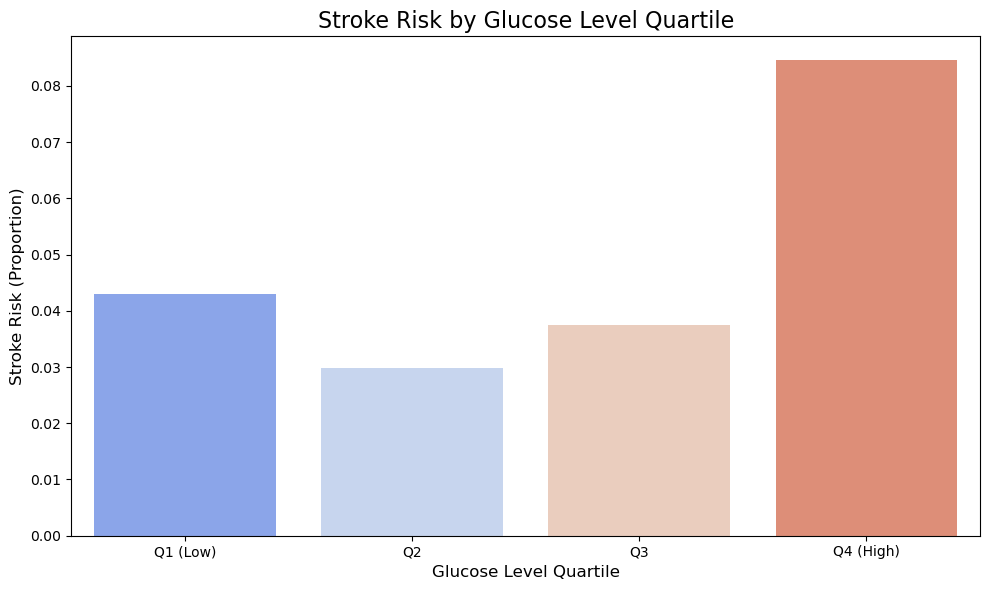

In [21]:
# Step 1: Create quartiles for avg_glucose_level
df['Glucose_Quartile'] = pd.qcut(df['avg_glucose_level'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

# Step 2: Calculate stroke risk for each quartile
glucose_risk = (
    df.groupby('Glucose_Quartile')['stroke']
    .mean()
    .reset_index(name='Stroke_Risk')
    .sort_values(by='Stroke_Risk', ascending=False)
)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=glucose_risk, x='Glucose_Quartile', y='Stroke_Risk', palette='coolwarm')

plt.title("Stroke Risk by Glucose Level Quartile", fontsize=16)
plt.xlabel("Glucose Level Quartile", fontsize=12)
plt.ylabel("Stroke Risk (Proportion)", fontsize=12)
plt.tight_layout()
plt.show()


High glucose level seem to give a higher risk of having a stroke if you are in the 4th quartile. The diffrence between Q1, Q2 and Q3 is not so big and in these groups there seem to be no correlation between high glucose levels and risk of stroke. 

In [22]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

## Who have the highest risk and who have the lowest risk of having a stroke?

I will now apply these methods on all columns to see "who" have the highest and "who" have the lowest risk of havine a stroke. I will check all columns if they are numerical or not. If they are numerical i will divide them into quartiles, if they are not then all unique answer will be a category (If a column only contains 0 and 1, I will treat it as categorical). I will then see wich category have the highest risk of a stroke and then print the results.

In [39]:
# Because the code both here and earlier actually adds new columns to the dataframe i need to read the original df again.
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

# Function to calculate stroke risk for categories and quartiles
def calculate_stroke_risk(df, column):
    # Check if the column is numerical or categorical
    if df[column].dtype in ['int64', 'float64']:  # Numerical column
        # If the column only contains 0 and 1, treat it as categorical
        if set(df[column].unique()) == {0, 1}:  # Binary (0/1) column
            stroke_risk = df.groupby(column)['stroke'].mean().reset_index()
            highest_risk_category = stroke_risk.loc[stroke_risk['stroke'].idxmax()]
            return highest_risk_category
        else:
            # Check if there are enough unique values to create quartiles
            if len(df[column].unique()) > 1:
                # Create quartiles
                df[f'{column}_Quartile'] = pd.qcut(df[column], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
                # Calculate stroke risk by quartile
                stroke_risk = df.groupby(f'{column}_Quartile')['stroke'].mean().reset_index()
                highest_risk_quartile = stroke_risk.loc[stroke_risk['stroke'].idxmax()]
                return highest_risk_quartile
            else:
                print(f"Skipping column {column} due to insufficient unique values for quartiles.")
                return None
    else:  # Categorical column
        # Calculate stroke risk by category
        stroke_risk = df.groupby(column)['stroke'].mean().reset_index()
        highest_risk_category = stroke_risk.loc[stroke_risk['stroke'].idxmax()]
        return highest_risk_category

# List to store results
results = []

# Loop through all columns in the dataframe
for column in df.columns:
    # Skip the 'stroke' column itself as it's the target variable
    if column == 'stroke':
        continue
    
    highest_risk = calculate_stroke_risk(df, column)
    
    if highest_risk is not None:
        # Add result to the results list
        results.append({
            'Column': column,
            'Highest Risk Category': highest_risk[0],
            'Stroke Risk': highest_risk[1]
        })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
results_df




C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1526779792.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_risk = df.groupby(f'{column}_Quartile')['stroke'].mean().reset_index()
C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1526779792.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Highest Risk Category': highest_risk[0],
C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1526779792.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

,Column,Highest Risk Category,Stroke Risk
0,id,Q4,0.055556
1,gender,Male,0.051064
2,age,Q4,0.139251
3,hypertension,1.0,0.132530
4,heart_disease,1.0,0.170290
5,ever_married,Yes,0.065613
6,work_type,Self-employed,0.079365
7,Residence_type,Urban,0.052003
8,avg_glucose_level,Q4,0.084573
9,bmi,Q3,0.055921


Then do exactly the same but with the lowest risk.

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

# Function to calculate stroke risk for categories and quartiles (lowest risk)
def calculate_lowest_stroke_risk(df, column):
    # Check if the column is numerical or categorical
    if df[column].dtype in ['int64', 'float64']:  # Numerical column
        # If the column only contains 0 and 1, treat it as categorical
        if set(df[column].unique()) == {0, 1}:  # Binary (0/1) column
            stroke_risk = df.groupby(column)['stroke'].mean().reset_index()
            lowest_risk_category = stroke_risk.loc[stroke_risk['stroke'].idxmin()]
            return lowest_risk_category
        else:
            # Check if there are enough unique values to create quartiles
            if len(df[column].unique()) > 1:
                # Create quartiles
                df[f'{column}_Quartile'] = pd.qcut(df[column], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
                # Calculate stroke risk by quartile
                stroke_risk = df.groupby(f'{column}_Quartile')['stroke'].mean().reset_index()
                lowest_risk_quartile = stroke_risk.loc[stroke_risk['stroke'].idxmin()]
                return lowest_risk_quartile
            else:
                print(f"Skipping column {column} due to insufficient unique values for quartiles.")
                return None
    else:  # Categorical column
        # Calculate stroke risk by category
        stroke_risk = df.groupby(column)['stroke'].mean().reset_index()
        lowest_risk_category = stroke_risk.loc[stroke_risk['stroke'].idxmin()]
        return lowest_risk_category

# List to store results
results = []

# Loop through all columns in the dataframe
for column in df.columns:
    # Skip the 'stroke' column itself as it's the target variable
    if column == 'stroke':
        continue
    
    lowest_risk = calculate_lowest_stroke_risk(df, column)
    
    if lowest_risk is not None:
        # Add result to the results list
        results.append({
            'Column': column,
            'Lowest Risk Category': lowest_risk[0],
            'Stroke Risk': lowest_risk[1]
        })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
results_df


C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1538283857.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_risk = df.groupby(f'{column}_Quartile')['stroke'].mean().reset_index()
C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1538283857.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Lowest Risk Category': lowest_risk[0],
C:\Users\benja\AppData\Local\Temp\ipykernel_11604\1538283857.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

,Column,Lowest Risk Category,Stroke Risk
0,id,Q3,0.039937
1,gender,Other,0.000000
2,age,Q1,0.001547
3,hypertension,0.0,0.039679
4,heart_disease,0.0,0.041787
5,ever_married,No,0.016505
6,work_type,Never_worked,0.000000
7,Residence_type,Rural,0.045346
8,avg_glucose_level,Q2,0.029757
9,bmi,Q1,0.017857


Drawing to much conclusions from this should be avoided and some categories are useless (like id) or probably have a small sample size (like work_type = never_worked). But it gives you a easy overview on who could have a higher chance of having a stroke.